Read an earthquake file

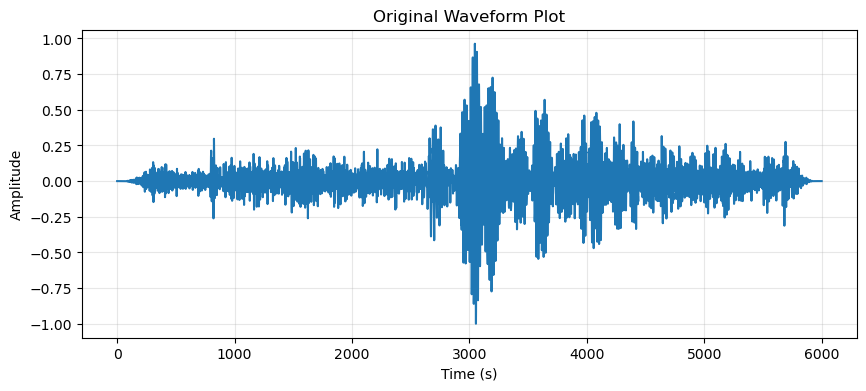

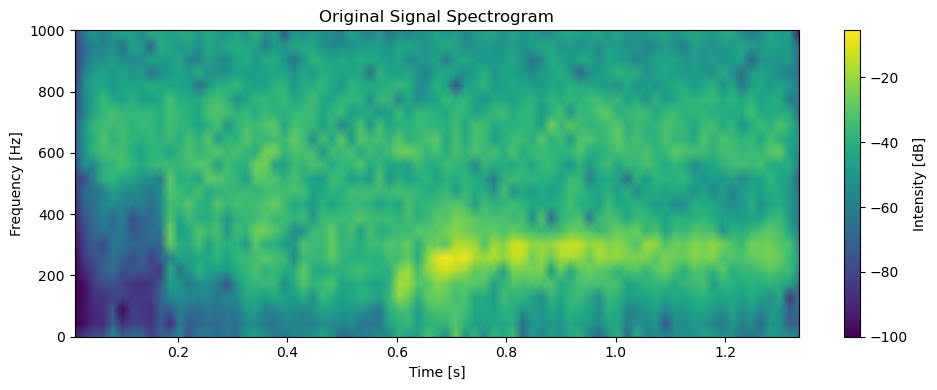

In [15]:
import matplotlib.pyplot as plt 
from scipy.io import wavfile
import numpy as np
from scipy.signal import resample_poly, spectrogram, butter, filtfilt
import IPython.display as ipd
import ipywidgets as widgets

# Read and process your data
times = []
amps = []
sample_rate = 44100   # Hz

with open("hhz_filtered_G31_20230520T015107.txt", "r") as quake:
    content = quake.readlines()
    for line in content:
        line_data = line.strip().split('\t')
        if len(line_data) >= 2:
            times.append(float(line_data[0]))
            amps.append(float(line_data[1]))

times = np.array(times)
amps = np.array(amps)

amps_norm = amps / np.max(np.abs(amps))  # Normalize the amplitudes

def plots(wav_times, wav_amps, wav_sample_rate, upper_freq):
    plt.figure(figsize=(10, 4))
    plt.plot(wav_times, wav_amps)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Original Waveform Plot')
    plt.grid(True, alpha=0.3)

    # Plot the spectrogram in dB
    plt.figure(figsize=(10, 4))
    frequencies, time_segments, Sxx = spectrogram(wav_amps, fs=wav_sample_rate, nperseg=1024, noverlap=256, scaling='spectrum')

    plt.pcolormesh(time_segments, frequencies, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title('Original Signal Spectrogram')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, upper_freq)

    plt.tight_layout()
    plt.show()

plots(times, amps_norm, sample_rate, upper_freq=1000)

wavfile.write('quake_audio.wav', sample_rate, np.array(amps_norm, dtype=np.float32))
ipd.Audio('quake_audio.wav')